<a href="https://colab.research.google.com/github/mttbanizi/PowerPlant-ML/blob/main/PowerPlant_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
https://rosenfelder.ai/multi-input-neural-network-pytorch/
```



In [1]:
pip install pytesseract

In [2]:
import cv2
import pytesseract
import numpy as np

In [3]:
# image = cv2.imread('7.jpg')

In [4]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_file_path = 'data.csv'  # Replace with the actual path to your CSV file
data_frame = pd.read_csv(csv_file_path)

# Now you can work with the pandas DataFrame 'data_frame'
# For example, you can print the first few rows of the DataFrame:
print(data_frame.head())

   11 19:58  346.328  133.408  33.298  301.484  124.509  306.326  131.007
0  11 20:58  310.272  142.474  32.017  396.497  125.188  436.629  131.780
1  11 21:58  305.023  143.402  31.036  399.970  125.666  439.996  132.644
2  11 22:58  246.803  145.404  30.811  399.976  117.174  439.991  123.214
3  11 23:58  231.144  146.174  31.650  400.008  115.559  439.964  122.931
4  12 00:58  220.564  147.361  30.994  399.911  116.726  439.964  124.278


In [5]:
new_column_titles = ['time', 'pressure', 'Steem MW', 'AmientTemp', 'B1_Flow', 'G1_MW', 'B2_Flow', 'G2_MW']

# Assign the new column titles to the DataFrame
data_frame.columns = new_column_titles

In [6]:
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW  
0  131.780  
1  132.644  
2  123.214  
3  122.931  
4  124.278  


In [7]:
# data_frame['Flow'] = data_frame['B1_Flow'].astype(float) + data_frame['B2_Flow'].astype(float)
data_frame['G_MW'] = data_frame['G1_MW'].astype(float) + data_frame['G2_MW'].astype(float)
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW     G_MW  
0  131.780  256.968  
1  132.644  258.310  
2  123.214  240.388  
3  122.931  238.490  
4  124.278  241.004  


In [8]:
# print(data_frame)

In [9]:
data_frame.at[37,'B1_Flow'] = 400

In [10]:
# result = data_frame[data_frame['B1_Flow'].str.contains('r')]
# print(result)

In [11]:
data_frame['Flow'] = data_frame['B1_Flow'].astype(float) + data_frame['B2_Flow'].astype(float)
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW     G_MW     Flow  
0  131.780  256.968  833.126  
1  132.644  258.310  839.966  
2  123.214  240.388  839.967  
3  122.931  238.490  839.972  
4  124.278  241.004  839.875  


In [12]:
data_frame_Modified = data_frame.drop(columns=['B1_Flow','B2_Flow','G1_MW', 'G2_MW'])
data_frame_Modified = data_frame_Modified.sort_values(by='Steem MW')

In [67]:
data_frame_Modified = data_frame_Modified.reset_index(drop=True)

In [69]:
print(data_frame_Modified)

        time  pressure  Steem MW  AmientTemp     G_MW     Flow
0   12 17:58   364.315   134.021      35.901  256.289  626.694
1   12 18:58   362.293   134.215      34.700  256.934  557.287
2   12 16:58   350.456   134.935      37.516  255.058  626.297
3   12 15:58   354.372   135.036      37.297  255.034  635.316
4   12 19:58   340.949   135.883      33.254  258.033  626.033
5   12 13:58   353.162   136.982      36.349  252.471  776.088
6   12 12:58   350.716   137.837      35.653  252.708  778.697
7   12 14:58   351.172   139.170      36.887  254.875  774.057
8   13 06:58   214.926   139.477      28.271  224.637  860.056
9   12 20:58   317.867   140.260      31.820  259.627  719.371
10  13 15:58   368.036   140.814      35.498  258.806  863.453
11  13 14:58   355.787   141.678      35.265  258.819  860.757
12  12 11:58   318.158   141.781      34.941  253.240  844.711
13  13 05:58   225.313   142.369      27.490  228.727  858.559
14  13 16:58   347.637   142.401      35.474  259.599  

In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [71]:
X = data_frame_Modified['Flow'].values
y = data_frame_Modified['Steem MW']


In [72]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(41, 41, 11, 11)

In [73]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

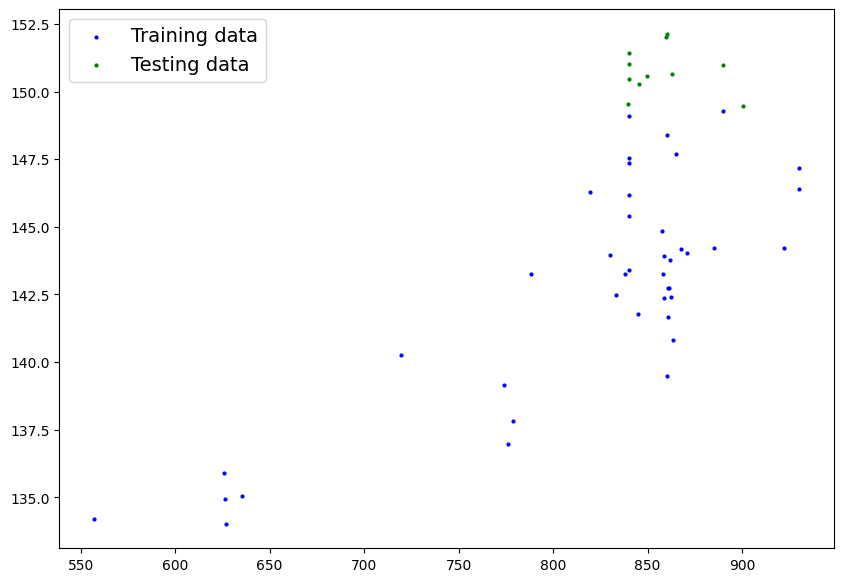

In [74]:
plot_predictions();

In [75]:
class PowerPredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(PowerPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # Input layer to hidden layer
        self.fc2 = nn.Linear(32, 16)         # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(16, 1)
                  # Final hidden layer to output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x =self.fc3(x)
        return x

# Initialize the model
input_dim = 1  # Number of input features
model = PowerPredictionModel(input_dim)


In [76]:
import torch.optim as optim

In [77]:
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [78]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [79]:
num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32).unsqueeze(dim=1)
    targets = torch.tensor(y_train, dtype=torch.float32).unsqueeze(dim=1)
    input_dim = inputs.size(dim=0)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 7115.6904
Epoch [2/100], Loss: -1251713591803904.0000
Epoch [3/100], Loss: -inf
Epoch [4/100], Loss: -inf
Epoch [5/100], Loss: nan
Epoch [6/100], Loss: nan
Epoch [7/100], Loss: nan
Epoch [8/100], Loss: nan
Epoch [9/100], Loss: nan
Epoch [10/100], Loss: nan
Epoch [11/100], Loss: nan
Epoch [12/100], Loss: nan
Epoch [13/100], Loss: nan
Epoch [14/100], Loss: nan
Epoch [15/100], Loss: nan
Epoch [16/100], Loss: nan
Epoch [17/100], Loss: nan
Epoch [18/100], Loss: nan
Epoch [19/100], Loss: nan
Epoch [20/100], Loss: nan
Epoch [21/100], Loss: nan
Epoch [22/100], Loss: nan
Epoch [23/100], Loss: nan
Epoch [24/100], Loss: nan
Epoch [25/100], Loss: nan
Epoch [26/100], Loss: nan
Epoch [27/100], Loss: nan
Epoch [28/100], Loss: nan
Epoch [29/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [31/100], Loss: nan
Epoch [32/100], Loss: nan
Epoch [33/100], Loss: nan
Epoch [34/100], Loss: nan
Epoch [35/100], Loss: nan
Epoch [36/100], Loss: nan
Epoch [37/100], Loss: nan
Epoch [38/100], Loss

In [80]:
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32).unsqueeze(dim=1)
    predictions = model(test_inputs)

# Calculate the evaluation metrics (e.g., RMSE, MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions.numpy())
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, predictions.numpy())

print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')


ValueError: ignored

In [82]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [83]:
X1 = data_frame_Modified[['pressure']].values
X2 = data_frame_Modified['G_MW'].values
X3 = data_frame_Modified['Flow'].values

In [84]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X1_train, X2_train, X3_train, y1_train = X1[:train_split], X2[:train_split], X3[:train_split], y[:train_split]
X1_test, X2_test, X3_test, y1_test = X1[train_split:], X2[train_split:], X3[train_split:], y[train_split:]


In [104]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.features = nn.Sequential(
          nn.Linear(in_features=input_dim, out_features=10),
          nn.Linear(in_features=10, out_features=10),
          nn.Linear(in_features=10, out_features=1),
          # nn.ReLU() # <- add in ReLU activation function
          # Can also put sigmoid in the model
          # This would mean you don't need to use it on the predictions
          # self.sigmoid = nn.Sigmoid()
        )

    def forward(self, X1):
      # Intersperse the ReLU activation function between layers
      X1_feature = self.features(X1)
      # X2_feature = self.features(X2)
      # X3_feature = self.features(X3)
      # return torch.cat((X1_feature, X2_feature, X3_feature), 1)
      return X1_feature
      #  return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2(input_dim=1).to(device)
print(model_3)
model_3.state_dict()

CircleModelV2(
  (features): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


OrderedDict([('features.0.weight',
              tensor([[-0.7341],
                      [-0.1727],
                      [ 0.2089],
                      [ 0.5163],
                      [ 0.8073],
                      [ 0.9110],
                      [-0.7929],
                      [ 0.2517],
                      [-0.4301],
                      [-0.1096]])),
             ('features.0.bias',
              tensor([-0.7485,  0.9109, -0.7340,  0.5345,  0.3514,  0.3250, -0.5406,  0.9090,
                       0.2198,  0.1286])),
             ('features.1.weight',
              tensor([[-0.2787,  0.1327, -0.0474, -0.1449,  0.2716,  0.0705, -0.1750, -0.1601,
                       -0.0151,  0.1766],
                      [-0.0808, -0.1804, -0.1083, -0.2362,  0.1128,  0.2448, -0.2977,  0.0734,
                        0.1634,  0.0573],
                      [-0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,  0.0338, -0.0559,
                       -0.0942,  0.2021],
                

In [92]:
import torch.optim as optim
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [87]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [88]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [89]:
y_test = list(y_test)

In [101]:
X1_train, X1_test = torch.as_tensor(X1_train, dtype=torch.float32).to(device), torch.as_tensor(X1_test,  dtype=torch.float32).to(device)
X2_train, X2_test = torch.as_tensor(X2_train, dtype=torch.float32).to(device), torch.as_tensor(X2_test, dtype=torch.float32).to(device)
X3_train, X3_test = torch.as_tensor(X3_train).to(device), torch.as_tensor(X3_test).to(device)
y_train, y_test = torch.as_tensor(y_train).to(device),  torch.as_tensor(y_test).to(device)


In [94]:
# Fit the model
torch.manual_seed(42)
epochs = 100

# Put all data on target device

for epoch in range(epochs):
    model_3.train()
    # 1. Forward pass
    # y_logits = model_3(X1_train, X2_train, X3_train)
    input_dim = X1_train.size(dim=0)
    y_logits = model_3(X1_train )
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X1_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([41])) that is different to the input size (torch.Size([41, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 10 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 20 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 30 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 40 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 50 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 60 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 70 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 80 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%
Epoch: 90 | Loss: 142.72985, Accuracy: 0.00% | Test Loss: 150.77281, Test Accuracy: 0.00%


In [97]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [110]:
X2_train = X2_train.unsqueeze(dim=1)
X2_test = X2_test.unsqueeze(dim=1)

In [111]:
epochs = 1000
for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X2_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X2_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([41])) that is different to the input size (torch.Size([41, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 100 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 200 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 300 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 400 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 500 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 600 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 700 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 800 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
Epoch: 900 | Train loss: 49.628666477110336 | Test loss: 505.3368835449219
